In [9]:
import pandas as pd

from datasets import load_dataset
import matplotlib.pyplot as plt

import numpy as np

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [7]:
df_us = df[df['job_country'] == 'United States'].copy()
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')

df_us

df_us_pivot = df_us.pivot_table(index = 'job_posted_month', columns = 'job_title_short', aggfunc = 'size')
df_us_pivot.reset_index(inplace = True)
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format = '%B').dt.month

In [8]:
df_us_pivot.sort_values('month_no', inplace = True)
df_us_pivot.set_index('job_posted_month', inplace = True)
df_us_pivot.drop(columns = 'month_no', inplace = True)
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [10]:
df_us_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col = 'job_posted_month')

df_us_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [ ]:
df_us_merged = df_us_pivot.merge(df_us_software_pivot, on = 'job_posted_month')

df_us_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [27]:
top_5_merged = (df_us_merged.sum()
         .sort_values(ascending = False)
         .head()
         .index.to_list())

top_5_merged

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

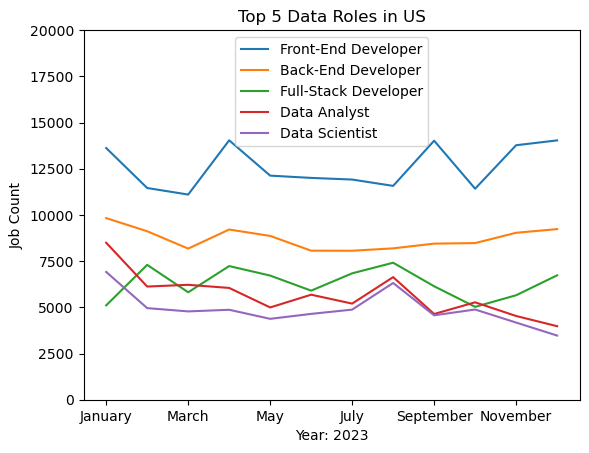

In [32]:
df_us_merged[top_5_merged].plot(kind = 'line')
plt.title('Top 5 Data Roles in US')
plt.xlabel('Year: 2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()


## Practice Problems

In [ ]:
df_us_jobs = df[df['job_country'] == 'United States']
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')

df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='postings_count')

df_merged = pd.merge(df_us_jobs, df_monthly_postings, on = 'job_posted_month', how = 'right')
df_merged.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,91822
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,91822
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,91822
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,91822
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,91822


In [ ]:
df_not_remote_job = df[df['job_work_from_home'] == False]

df_not_remote_salary = df_not_remote_job.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
df_not_remote_salary.rename(columns = {'salary_year_avg': 'salary_not_remote_avg'}, inplace = True)

merged_df = pd.merge(df_not_remote_job, df_not_remote_salary, on='job_title_short', how = 'right')

merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",90177.41994


In [ ]:
df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index()
df_company_remote = df[df['job_work_from_home'] == True].groupby('company_name').size().reset_index(name='remote_count')
df_merged = pd.merge(df_company_salary, df_company_remote, on='company_name', how='inner')
df_merged.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1
